In [108]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random

In [109]:
N = 200
b = .5
S = np.zeros(N)
n = 5

In [110]:
def reset_S(N):
    S = np.arange(N)
    S = np.maximum(S-N/2, N/2-S)
    return S

In [111]:
def brick_update_S(S):
    nextS = np.copy(S)
    for idx, val in enumerate(S):
        if (idx != 0) and (idx != N-1):
            nextS[idx] = np.minimum(S[idx-1]+1, S[idx+1]+1)
            if nextS[idx] < S[idx]: raise ValueError("Decreasing entropy")
    return(nextS)

In [300]:
def random_update_S(S,b):
    nextS = np.copy(S)
    for idx, val in enumerate(S):
        if (idx != 0) and (idx != N-1):
            if random.random() < b: nextS[idx] = np.minimum(S[idx-1]+1, S[idx+1]+1)
            if nextS[idx] < S[idx]: raise ValueError("Decreasing entropy")
    return(nextS)

In [243]:
def stair_update_S(S, n):
    nextS = np.copy(S)
    N = len(S)
    site = int(np.floor((N-n) * random.random()))
#     print(site-N/2)
    for idx in range(site, site+n):
        if (idx != 0) and (idx != N-1):
            nextS[idx] = np.minimum(S[idx-1]+1, S[idx+1]+1)
            if nextS[idx] < S[idx]: raise ValueError("Decreasing entropy")
    return(nextS)

In [311]:
def continuous_stair_update_S(S):
    nextS = np.copy(S)
    for idx, val in enumerate(S):
        if (idx != 0) and (idx != N-1):
            nextS[idx] = np.minimum(nextS[idx-1]+1, S[idx+1]+1)
            if nextS[idx] < S[idx]: raise ValueError("Decreasing entropy")
    return(nextS)

In [330]:
def spaced_stair_update_S(S, n):
    nextS = np.copy(S)
    N = len(S)
    for idx in range(0, n):
        for jdx in range(idx, idx+N, n):
            if (jdx != 0) and (jdx != N-1):
#                 print(jdx)
                nextS[jdx] = np.minimum(nextS[jdx-1]+1, S[jdx+1]+1)
                if nextS[jdx] < S[jdx]: raise ValueError("Decreasing entropy")
    return(nextS)

In [114]:
def multi_brick_update_S(S,i):
    for j in range(i):
        S = brick_update_S(S)
    return(S)

In [115]:
def multi_random_update_S(S,b,i):
    for j in range(i):
        S = random_update_S(S,b)
    return(S)

In [116]:
def multi_stair_update_S(S,n,i):
    for j in range(i):
        S = stair_update_S(S,n)
    return(S)

In [117]:
def draw_S(S, show = False, save = None):
    plt.step(np.arange(N)-N/2, S, where='mid')
    
    axes = plt.gca()
    axes.set_xlim([0-N/2,N/2-1])
    axes.set_ylim([0,np.max(S)])
    
    plt.ylabel("S")
    plt.xlabel("y-x")
    plt.title("S(x,y)")
    if show: plt.show()
    if save: plt.savefig(save)
    plt.close()

# Deterministic Circuit

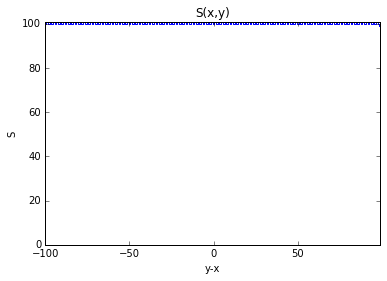

In [118]:
N = 200
    
S = reset_S(N)
draw_S(S, save = "figures/brickwork/brickwork_N{:02}T00.pdf".format(N))

for i in range(100):
    S = brick_update_S(S)
    if ((i+1)%4) == 0: draw_S(S, save = "figures/brickwork/brickwork_N{:02}T{:02}.pdf".format(N,i+1))
draw_S(S, show=True)

# Random Gates, b = .5

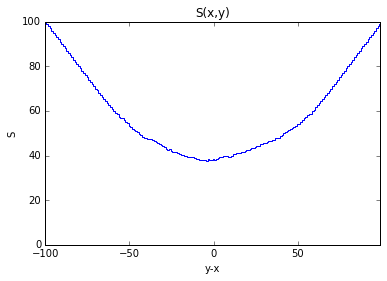

In [306]:
N = 200
b = .5
steps = 120
trials = 10

S = reset_S(N)
totS = np.zeros(N)

for i in range(trials):
    totS += multi_random_update_S(S, b, steps)
    
totS /= trials
draw_S(totS, show=True)

# Large Staircases, "Small" Time

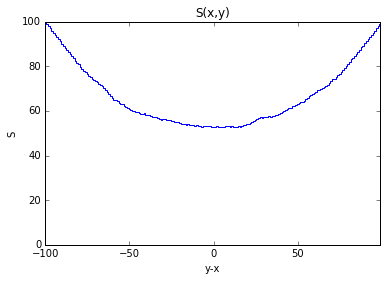

In [279]:
N = 200
n = 10
steps = 1500
trials = 15

S = reset_S(N)
totS = np.zeros(N)

for i in range(trials):
    totS += multi_stair_update_S(S, n, steps)
    
totS /= trials
draw_S(totS, show=True)

# Small Staircases, Large Time

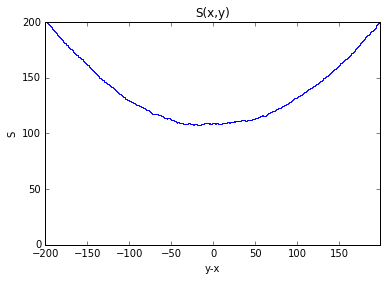

In [256]:
N = 400
n = 2
steps = 40000
trials = 10

S = reset_S(N)
totS = np.zeros(N)

for i in range(trials):
    totS += multi_stair_update_S(S, n, steps)
    
totS /= trials
draw_S(totS, show=True)

# Continuous Stair

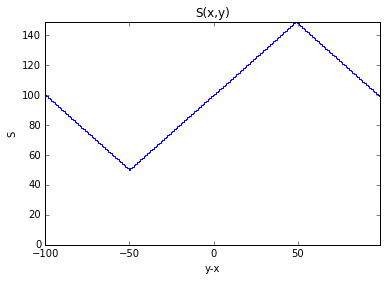

In [314]:
N = 200
    
S = reset_S(N)
draw_S(S, save = "figures/cont_stair/cont_N{:02}T00.pdf".format(N))

for i in range(50):
    S = continuous_stair_update_S(S)
    if ((i+1)%4) == 0: draw_S(S, save = "figures/cont_stair/cont_N{:02}T{:02}.pdf".format(N,i+1))
draw_S(S, show=True)

# Spaced Stairs

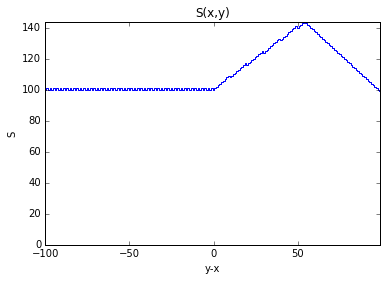

In [333]:
N = 200
n = 5
    
S = reset_S(N)
draw_S(S, save = "figures/cont_stair/cont_N{:02}T00.pdf".format(N))

for i in range(100):
    S = spaced_stair_update_S(S, n)
    if ((i+1)%1) == 0: draw_S(S, save = "figures/space_stair/space_N{:02}T{:02}.pdf".format(N,i+1))
draw_S(S, show=True)

# Compare Brickwork and Random

In [287]:
N = 200
b = .5
steps = 100
trials = 10

initS = reset_S(N)
totS = np.zeros(N)

for i in range(trials):
    totS += multi_random_update_S(initS, b, steps)
    
totS /= trials
initS = totS

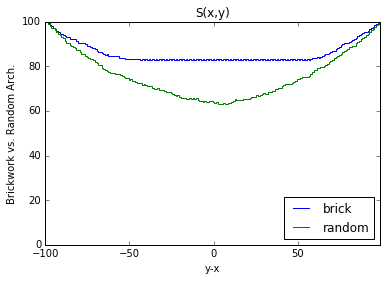

In [293]:
brickS = initS
randomSs = np.zeros((trials, N))
for i in range(trials):
    randomSs[i] = initS

for i in range(50):
    brickS = brick_update_S(brickS)
    for j in range(trials):
        randomSs[j] = multi_random_update_S(randomSs[j], b, 2)
    totS = np.sum(randomSs, axis=0)
    
    if (i%5 == 0): ## Draw ##
        plt.step(np.arange(N)-N/2, brickS, where='mid', label = "brick")
        plt.step(np.arange(N)-N/2, totS/trials, where='mid', label = "random")
    
        axes = plt.gca()
        axes.set_xlim([0-N/2,N/2-1])
        axes.set_ylim([0,np.max(S)])
    
        plt.legend(loc=4)
        plt.ylabel("Brickwork vs. Random Arch.")
        plt.xlabel("y-x")
        plt.title("S(x,y)")
        plt.savefig("figures/compare/compare_N{:02}T{:02}.pdf".format(N,i+1))
        plt.close()
    
plt.step(np.arange(N)-N/2, brickS, where='mid', label = "brick")
plt.step(np.arange(N)-N/2, totS/trials, where='mid', label = "random")
    
axes = plt.gca()
axes.set_xlim([0-N/2,N/2-1])
axes.set_ylim([0,np.max(S)])
    
plt.legend(loc=4)
plt.ylabel("Brickwork vs. Random Arch.")
plt.xlabel("y-x")
plt.title("S(x,y)")
plt.show()
plt.close()

# Brickwork at non-max slope

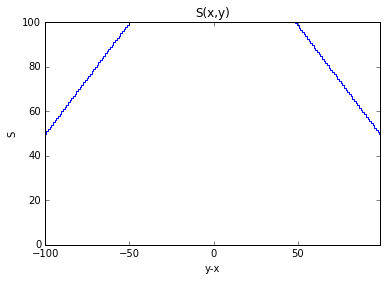

In [297]:
N = 200
S = np.arange(N)
S = np.maximum(N/4 - S, S/3 - N/12)

draw_S(S, save = "figures/slope/slope_N{:02}T00.pdf".format(N))

for i in range(100):
    S = brick_update_S(S)
    if ((i+1)%4) == 0: draw_S(S, save = "figures/slope/slope_N{:02}T{:02}.pdf".format(N,i+1))
draw_S(S, show=True)

### Testing

5.0
6.0
7.0
8.0
9.0


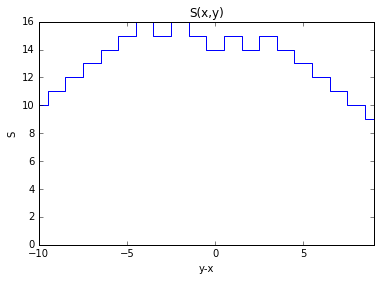

In [247]:
N = 20
n = 5

def stair_update_S2(S, n):
    nextS = np.copy(S)
    N = len(S)
    site = 15
    for idx in range(site, site+n):
        print(idx-N/2)
        if (idx != 0) and (idx != N-1):
            nextS[idx] = np.minimum(S[idx-1]+1, S[idx+1]+1)
            if nextS[idx] < S[idx]: raise ValueError("Decreasing entropy")
    return(nextS)

# S = reset_S(N)
S = stair_update_S2(S,n)
draw_S(S, show = True)

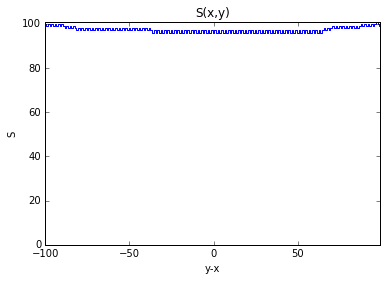

In [310]:
N = 200
b = .99
    
S = reset_S(N)
draw_S(S, save = "figures/other/near_brickwork_N{:02}T00.pdf".format(N))

for i in range(50):
    S = random_update_S(S, b)
    if ((i+1)%4) == 0: draw_S(S, save = "figures/other/near_brickwork_N{:02}T{:02}.pdf".format(N,i+1))
for i in range(50):
    S = brick_update_S(S)
    if ((i+51)%4) == 0: draw_S(S, save = "figures/other/near_brickwork_N{:02}T{:02}.pdf".format(N,i+51))
        
draw_S(S, show=True)

In [315]:
for i in range(0,10,2): print(i)

0
2
4
6
8
